In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [20]:
# make aninal as a index ==> otherwise it will give a error of,
# could not convert string to float: 'HORSE'

milk = pd.read_csv("milk.csv", index_col = 0)
milk

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [16]:
sc = StandardScaler().set_output(transform = "pandas")

In [21]:
sc.fit(milk)
m_scaled = sc.transform(milk)

In [22]:
# obj of pca

pca = PCA().set_output(transform = "pandas")

# fit the model in pca;
pc = pca.fit_transform(m_scaled)

# find correlation;
pc.corr()

,pca0,pca1,pca2,pca3,pca4
pca0,1.000000e+00,-7.659716e-17,1.350210e-16,-1.436333e-17,0.000000e+00
pca1,-7.659716e-17,1.000000e+00,1.706851e-16,0.000000e+00,1.187218e-16
pca2,1.350210e-16,1.706851e-16,1.000000e+00,-1.945009e-16,2.238765e-16
pca3,-1.436333e-17,0.000000e+00,-1.945009e-16,1.000000e+00,2.226244e-17
pca4,0.000000e+00,1.187218e-16,2.238765e-16,2.226244e-17,1.000000e+00


In [23]:
# find covarience 

pc.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

In [24]:
# find the eigen values and vectors of a sq mat ==> linalg.eig()

np.linalg.eig(m_scaled.cov())

EigResult(eigenvalues=array([4.0404117 , 0.92437238, 0.00656977, 0.13429088, 0.1026886 ]), eigenvectors=array([[-0.47294379,  0.35285509, -0.70967042,  0.36921298,  0.10893632],
       [ 0.46657047,  0.32094099, -0.1930657 ,  0.15196177, -0.78672876],
       [ 0.44868269, -0.47603724, -0.66831106, -0.30699163,  0.17660367],
       [-0.48289116,  0.05951482, -0.11159049, -0.77642589, -0.38468756],
       [ 0.35232959,  0.73643513,  0.00118661, -0.378825  ,  0.43590982]]))

In [27]:
# to a measure of how much of the total variance in the original data is captured by each PC
# It essentially tells you how informative a particular PC is in representing the data's variability.

pca.explained_variance_


array([4.0404117 , 0.92437238, 0.13429088, 0.1026886 , 0.00656977])

In [28]:
# determine how many PC to retain while maximizing the information captured from data. 

pca.explained_variance_ratio_


array([0.77575905, 0.1774795 , 0.02578385, 0.01971621, 0.0012614 ])

In [29]:
# in %
pca.explained_variance_ratio_ * 100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

In [30]:
# find cumulative sum()

np.cumsum(pca.explained_variance_ratio_)

array([0.77575905, 0.95323854, 0.97902239, 0.9987386 , 1.        ])

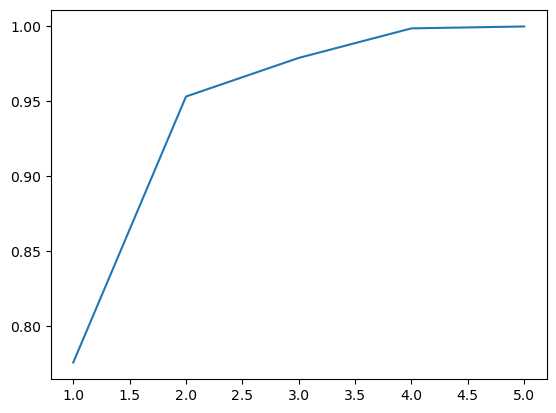

In [31]:
# defind X and y

y = np.cumsum(pca.explained_variance_ratio_)
X = np.arange(1,6)
plt.plot(X,y)
plt.show()